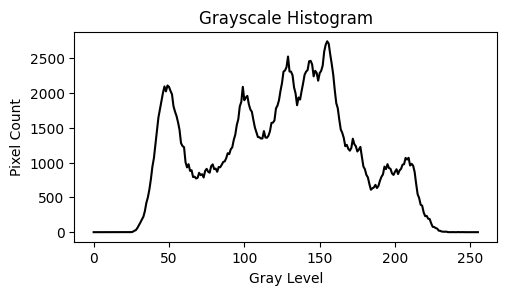

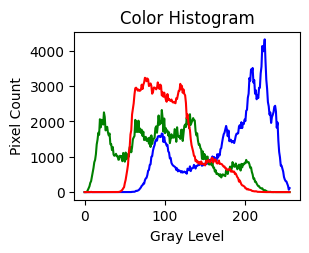

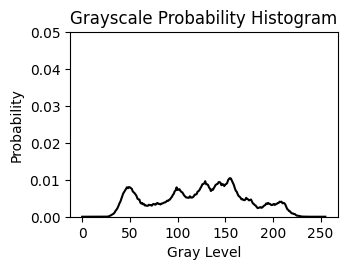

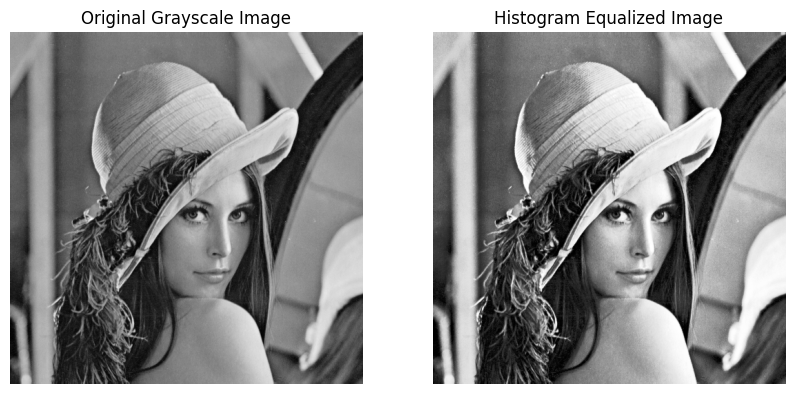

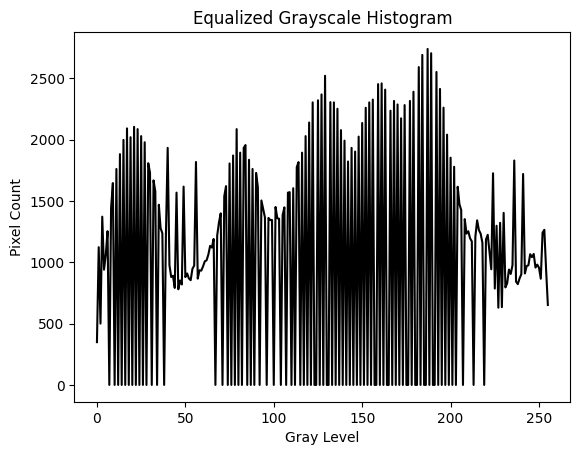

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram(image, title, method='count'):
    if len(image.shape) == 2:  # Grayscale image
        hist = cv2.calcHist([image], [0], None, [256], [0, 256])
        plt.plot(hist, color='black')
    else:  # Color image
        colors = ('b', 'g', 'r')
        for i, color in enumerate(colors):
            hist = cv2.calcHist([image], [i], None, [256], [0, 256])
            plt.plot(hist, color=color)

    plt.title(title)
    plt.xlabel("Gray Level")
    plt.ylabel("Pixel Count" if method == 'count' else "Probability")
    if method == 'probability':
        plt.ylim(0, 1)
    plt.show()

def histogram_analysis(image_path):
    # Load color image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

    # Plot histograms
    plt.figure(figsize=(12, 6))
    plt.subplot(2, 2, 1)
    plot_histogram(gray_image, "Grayscale Histogram")

    plt.subplot(2, 2, 2)
    plot_histogram(image, "Color Histogram")

    # Probability histogram
    hist_gray = cv2.calcHist([gray_image], [0], None, [256], [0, 256])
    hist_gray /= hist_gray.sum()
    plt.subplot(2, 2, 3)
    plt.plot(hist_gray, color='black')
    plt.title("Grayscale Probability Histogram")
    plt.xlabel("Gray Level")
    plt.ylabel("Probability")
    plt.ylim(0, 0.05)

    plt.tight_layout()
    plt.show()

    # Contrast Enhancement using Histogram Equalization
    equalized_image = cv2.equalizeHist(gray_image)

    # Display images before and after equalization
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(gray_image, cmap='gray')
    plt.title("Original Grayscale Image")
    plt.axis("off")

    plt.subplot(1, 2, 2)
    plt.imshow(equalized_image, cmap='gray')
    plt.title("Histogram Equalized Image")
    plt.axis("off")

    plt.show()

    # Histogram after equalization
    plt.figure()
    plot_histogram(equalized_image, "Equalized Grayscale Histogram")

# Run analysis on an image
image_path = "Lena_Image.png"  # Change this to your image path
histogram_analysis(image_path)

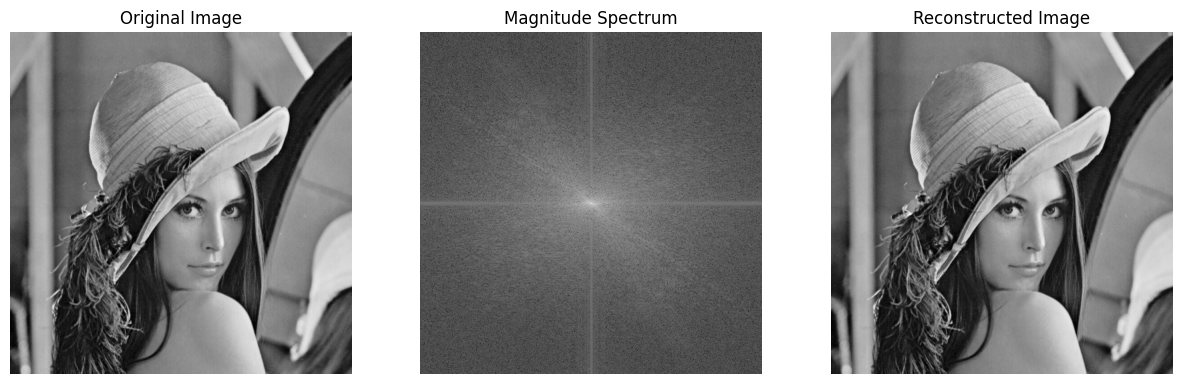

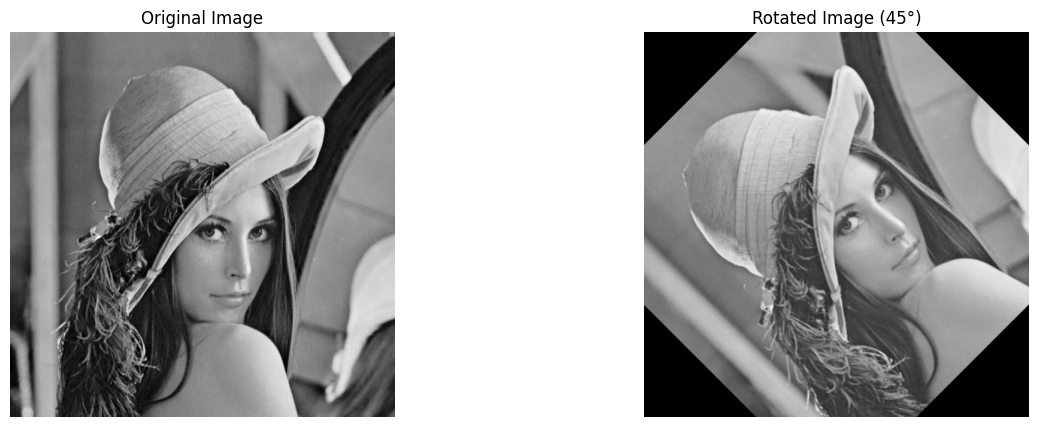

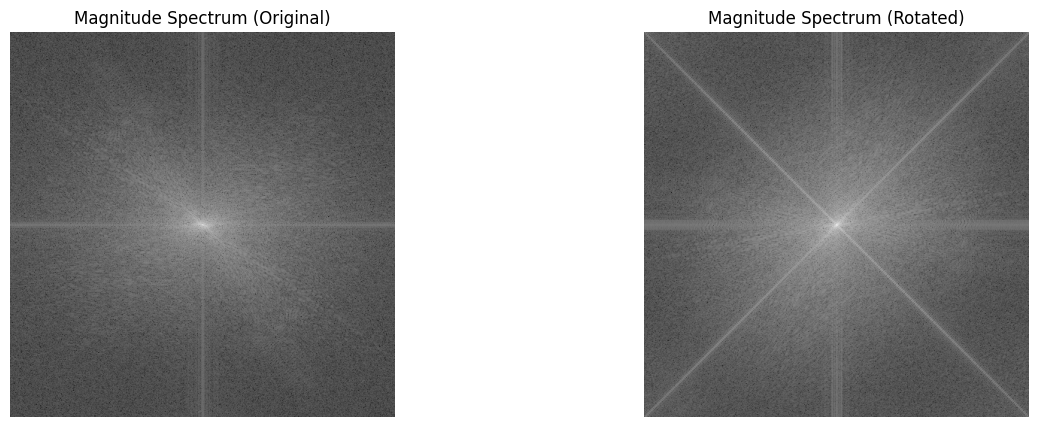

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def compute_fft(image):
    """Compute the Fourier Transform and return its magnitude spectrum."""
    f = np.fft.fft2(image)  # Compute 2D FFT
    fshift = np.fft.fftshift(f)  # Shift zero frequency component to center
    magnitude_spectrum = 20 * np.log(np.abs(fshift) + 1)  # Log for better visualization
    return f, fshift, magnitude_spectrum

def compute_ifft(fshift):
    """Compute the Inverse Fourier Transform and return the reconstructed image."""
    f_ishift = np.fft.ifftshift(fshift)  # Inverse shift
    img_reconstructed = np.fft.ifft2(f_ishift)  # Inverse FFT
    img_reconstructed = np.abs(img_reconstructed)  # Get magnitude
    return img_reconstructed

def rotate_image(image, angle):
    """Rotate an image by a given angle using OpenCV."""
    h, w = image.shape
    center = (w // 2, h // 2)
    rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
    rotated_image = cv2.warpAffine(image, rotation_matrix, (w, h))
    return rotated_image

def plot_images(images, titles, cmap='gray'):
    """Display multiple images in a row."""
    plt.figure(figsize=(15, 5))
    for i in range(len(images)):
        plt.subplot(1, len(images), i + 1)
        plt.imshow(images[i], cmap=cmap)
        plt.title(titles[i])
        plt.axis('off')
    plt.show()

def main():
    # Load image in grayscale
    image_path = "Lena_Image.png"  # Change to your image path
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    if img is None:
        print("Error: Could not load image. Check the file path!")
        return

    # Step 1: Compute FFT and display magnitude spectrum
    f, fshift, magnitude_spectrum = compute_fft(img)

    # Step 2: Perform Inverse FFT and reconstruct image
    img_reconstructed = compute_ifft(fshift)

    # Display original, magnitude spectrum, and reconstructed images
    plot_images([img, magnitude_spectrum, img_reconstructed],
                ["Original Image", "Magnitude Spectrum", "Reconstructed Image"])

    # Step 3: Verify Rotation Property
    rotated_img = rotate_image(img, 45)  # Rotate by 45 degrees
    _, rotated_fshift, rotated_magnitude_spectrum = compute_fft(rotated_img)

    # Display original vs rotated image, and their magnitude spectrums
    plot_images([img, rotated_img],
                ["Original Image", "Rotated Image (45°)"])

    plot_images([magnitude_spectrum, rotated_magnitude_spectrum],
                ["Magnitude Spectrum (Original)", "Magnitude Spectrum (Rotated)"])

if __name__ == "__main__":
    main()
